# FM Synthesis 
## George Tzanetakis 



Modulation means change. In frequency modulation the frequency of an oscillator is modulated by another oscillator. 
In classic FM synthesis both oscillators are sinusoidal oscillators. 

write about Chowning, entered the wrong number for vibrato. 

A standard sinusoidal oscillator can be written as: 

$$ 
cos(\omega_{c} t + \phi(t)) 
$$ 

where the c subscript stands for "carrier" and $\phi(t)$ means "some arbitrary function added to the carrier". 
When the change is applied to the argument to the $cos$ function i.e $cos(angle+change)$ this is called **Phase Modulation** or we can add the change to the current phase and then take the cos i.e $cos(angle+=change)$ in which case it is called **Frequency Modulation**. In terms of accuracy and computational efficiency these two approaches 
are indistinguishable so we will just talk about **FM synthesis** going forward. 

If the modulating function is a sinusoidal oscillator we have: 
$$ 
cos(\omega_{c} t + I sin(\omega_{m}t)
$$ 

where $I$ is called the modulation index. 



In [640]:
import IPython.display as ipd
import numpy as np
import bokeh 
import librosa
from audio2numpy import open_audio
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
import matplotlib.pyplot as plt


output_notebook()

Loading BokehJS ...

In [641]:
def hz2radians(f, srate):
    return 2 * np.pi * f / srate

In [642]:
def phase_modulation(start, end, freq, amp, mc_ratio, index, srate): 
    output = np.zeros(end-start)
    carrier_phase = 0.0 
    carrier_phase_incr = hz2radians(freq, srate)
    modulator_phase = 0.0 
    modulator_phase_incr = hz2radians(mc_ratio * freq, srate)
    for t in np.arange(start, end): 
        modulation = index * np.sin(modulator_phase)
        output[t] = amp * np.sin(carrier_phase + modulation)
        carrier_phase += carrier_phase_incr
        modulator_phase += modulator_phase_incr
    return output 

srate = 48000 
output = phase_modulation(0, srate, 1000, .5, 0.25, 4, srate)
output1=output
print(output)
print("hello")
output = open_audio('cup1.mp3')
output = output[0]
output2 = output
output = output.flatten()
print(output)
print("hello")
output1 = open_audio('cup2.mp3')
output1 = output1[0]
output3 = output1
output1 = output1.flatten()
print(output1)



[ 0.          0.12939824  0.24991908 ... -0.3533304  -0.24991908
 -0.12939824]
hello
[-3.0517578e-05 -9.1552734e-05 -6.1035156e-05 ...  3.9062500e-03
  3.4179688e-03  2.8686523e-03]
hello
[-3.0517578e-05  0.0000000e+00 -6.1035156e-05 ...  3.9672852e-04
  1.0314941e-02  2.4414062e-04]


In [643]:
mag_spectrum = abs(np.fft.rfft(output))
p = figure(width=600, height=200)
freqs = np.linspace(0, 0.5 * srate, len(mag_spectrum))
max_freq_bin = int(srate / len(mag_spectrum) * 2000)
p.line(freqs[0:max_freq_bin],mag_spectrum[0:max_freq_bin] * 2 * (1.0 / srate))
show(p)

mag_spectrum = abs(np.fft.rfft(output1))
p = figure(width=600, height=200)
freqs = np.linspace(0, 0.5 * srate, len(mag_spectrum))
max_freq_bin = int(srate / len(mag_spectrum) * 2000)
p.line(freqs[0:max_freq_bin],mag_spectrum[0:max_freq_bin] * 2 * (1.0 / srate))
show(p)

In [644]:
ipd.Audio(output, rate=srate)

In [645]:
ipd.Audio(output1, rate=srate)

In [646]:
def plot(data_list): 
    fig, ax = plt.subplots(figsize=(4,3))
    for data in data_list: 
        plt.plot(data)    

def envelope(segments,srate,duration): 
    nsamples = int(srate*duration)
    value = 0.0
    segment_index = 0 
    data = np.zeros(nsamples)
    segment_sample = 0 
    prev_target = 0.0

    for i in np.arange(nsamples): 
        if (segment_index < len(segments)): 
            target = segments[segment_index][0]
            rampT = segments[segment_index][1]
            delayT = 0
            
            rampS = (rampT / 1000.0) * srate 
            delayS = (delayT / 1000.0) * srate
            
            if i < segment_sample + rampS: 
                incr = (target-prev_target) / rampS 
            elif i < segment_sample + rampS + delayS: 
                incr = 0.0 
            else: 
                if rampS != 0.0: 
                    incr = (target-prev_target) / rampS 
                else: 
                    incr = 0.0 
                segment_sample = i 
                segment_index = segment_index+1 
                prev_target = target 
            value = value + incr 
        data[i] = value
    return data  
    

s1 = output3
s2 = output2
print(s1)
print(s2)
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

dur = 1.0

srate = 44100

penv1 = envelope(s1, srate, 1.0)
penv2 = envelope(s2, srate, 1.0)

f0 = 350 
osc1 = sinusoid(f0, dur=dur)
osc2 = sinusoid(2*f0, dur=dur)
osc3 = sinusoid(3*f0, dur=dur)
osc4 = sinusoid(4*f0, dur=dur)

# penv1 = (np.vstack((penv1, osc1)).T + np.vstack((penv1, osc2)).T + np.vstack((penv1, osc3)).T + np.vstack((penv1, osc4)).T)
# penv2 = (np.vstack((penv2, osc1)).T + np.vstack((penv2, osc2)).T + np.vstack((penv2, osc3)).T + np.vstack((penv2, osc4)).T)
penv1 = osc1 +osc2 +osc3 +osc4 + penv1
penv2 = osc1 +osc2 +osc3 +osc4 + penv2

print(type(penv1))

#data = np.concatenate([output1, output2])



[[-3.0517578e-05  0.0000000e+00]
 [-6.1035156e-05 -3.0517578e-05]
 [-9.1552734e-05 -6.1035156e-05]
 ...
 [ 6.2255859e-03  3.3569336e-04]
 [ 1.1779785e-02  3.9672852e-04]
 [ 1.0314941e-02  2.4414062e-04]]
[[-3.0517578e-05 -9.1552734e-05]
 [-6.1035156e-05 -6.1035156e-05]
 [-3.0517578e-05 -9.1552734e-05]
 ...
 [ 4.2419434e-03  3.3264160e-03]
 [ 4.5471191e-03  3.9062500e-03]
 [ 3.4179688e-03  2.8686523e-03]]
<class 'numpy.ndarray'>


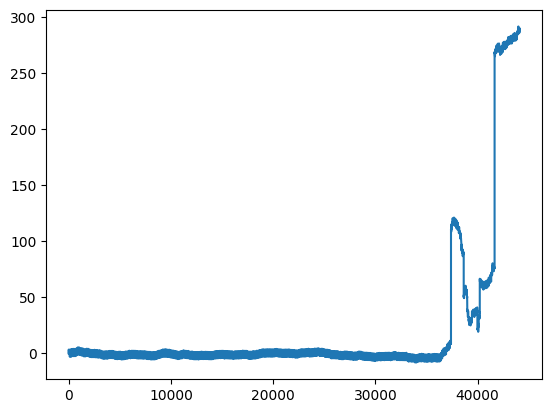

In [647]:
plt.plot(penv1)

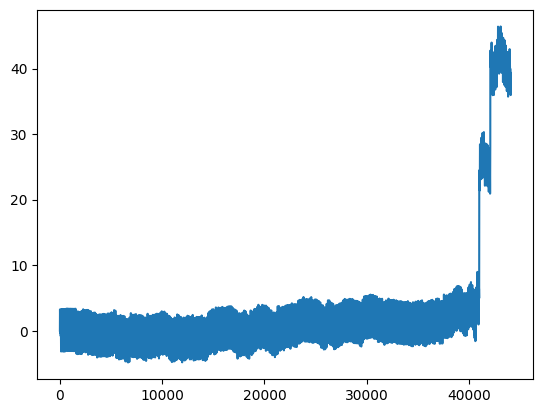

In [648]:
plt.plot(penv2)

In [649]:
data = np.concatenate([penv1, penv2])
ipd.Audio(data,rate=srate)

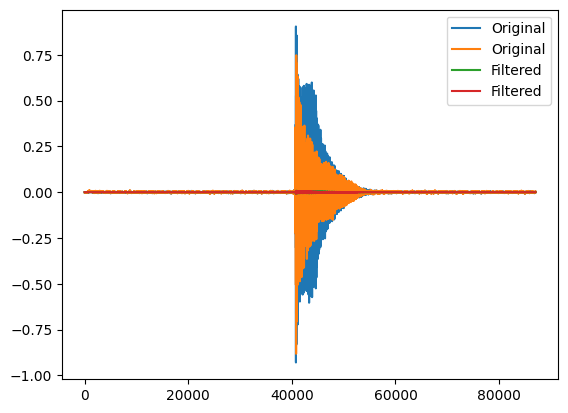

In [650]:
import numpy as np

class TwoPoleFilter:
    def __init__(self, fs, f0, Q):
        self.fs = fs
        self.f0 = f0
        self.Q = Q
        
        self.w0 = 2 * np.pi * f0 / fs
        self.alpha = np.sin(self.w0) / (2 * Q)
        self.b0 = 1 - np.cos(self.w0)
        self.b1 = 2 * (np.cos(self.w0) - 1)
        self.b2 = 1 - np.cos(self.w0)
        self.a0 = 1 + self.alpha
        self.a1 = -2 * np.cos(self.w0)
        self.a2 = 1 - self.alpha
    
    def filter(self, x):
        y = np.zeros_like(x)
        for n in range(len(x)):
            if n == 0:
                y[n] = self.b0 * x[n]
            elif n == 1:
                y[n] = self.b0 * x[n] + self.b1 * x[n-1] - self.a1 * y[n-1]
            else:
                y[n] = self.b0 * x[n] + self.b1 * x[n-1] + self.b2 * x[n-2] - self.a1 * y[n-1] - self.a2 * y[n-2]
        return y

import soundfile as sf
import matplotlib.pyplot as plt

signal, fs = sf.read('cup1.mp3')

f0 = 1000  # Hz
Q = 10
filter = TwoPoleFilter(fs, f0, Q)

filtered_signal = filter.filter(signal)

plt.plot(signal, label='Original')
plt.plot(filtered_signal, label='Filtered')
plt.legend()
plt.show()

sf.write('filtered_cup1.wav', filtered_signal, fs)
filtered_signal1=filtered_signal


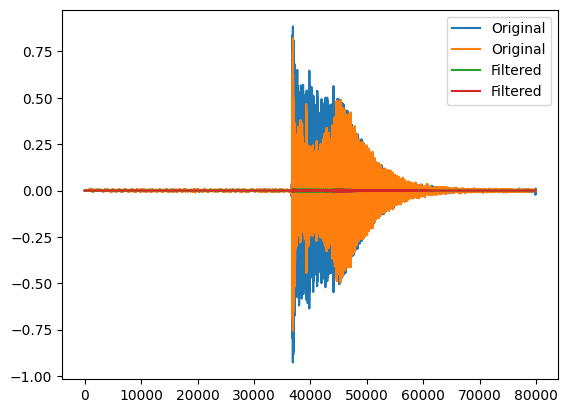

In [651]:
signal, fs = sf.read('cup2.mp3')

f0 = 1000  # Hz
Q = 10
filter = TwoPoleFilter(fs, f0, Q)

filtered_signal = filter.filter(signal)

plt.plot(signal, label='Original')
plt.plot(filtered_signal, label='Filtered')
plt.legend()
plt.show()

sf.write('filtered_cup2.wav', filtered_signal, fs)


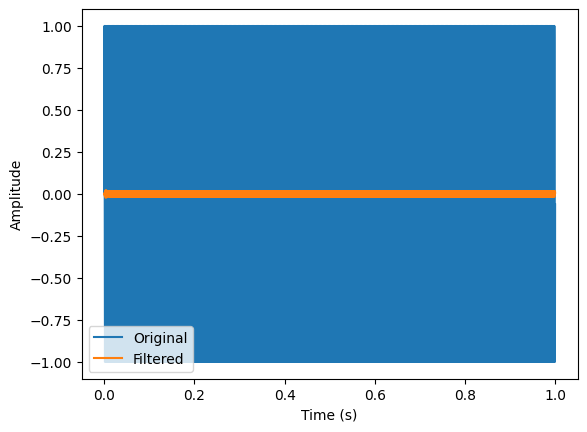

In [652]:


fs = 44100  # Hz
duration = 1  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
f0 = 440  # Hz
x = np.sin(2 * np.pi * f0 * t)

f0 = 1000  # Hz
Q = 5
filter = TwoPoleFilter(fs, f0, Q)

y = filter.filter(x)

plt.plot(t, x, label='Original')
plt.plot(t, y, label='Filtered')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
ipd.Audio(y,rate=srate)

In [653]:
import scipy.signal
import numpy as np
import IPython.display as ipd
import boreal
import math
from scipy import stats

srate = 48000
N = int(1.5*srate)   # number of samples to compute
cup1noise=filtered_signal1.flatten()
cup2noise=filtered_signal.flatten()
impulse = np.zeros(N)
impulse[0] = 1 
band1, aValue = scipy.signal.butter(4, [50/(srate/2), 1000/(srate/2)], btype='band')
filter1 = scipy.signal.filtfilt(band1, aValue, cup1noise)
filter2 = scipy.signal.filtfilt(band1, aValue, cup2noise)
S1 = librosa.stft(filter1, n_fft=2048, hop_length=512)
S2 = librosa.stft(filter2, n_fft=2048, hop_length=512)
E1 = np.abs(S1)**2
E2 = np.abs(S2)**2
freqs = librosa.fft_frequencies(sr=srate, n_fft=2048)
decay_times1 = np.zeros_like(freqs)
decay_times2 = np.zeros_like(freqs)
for i in range(len(freqs)):
    env = scipy.signal.hilbert(E1[i])
    env_db = 20 * np.log10(env/np.max(env))
    threshold_db = np.max(env_db) - 40  # dB
    t = np.arange(len(env)) / srate
    envelope = np.interp(t, t[env_db >= threshold_db], env[env_db >= threshold_db])
    slope, intercept, r_value, p_value, std_err = stats.linregress(t, np.log(envelope))
    decay_times1[i] = -1/slope
for i in range(len(freqs)):
    env = scipy.signal.hilbert(E2[i])
    env_db = 20 * np.log10(env/np.max(env))
    threshold_db = np.max(env_db) - 40  # dB
    t = np.arange(len(env)) / srate
    envelope = np.interp(t, t[env_db >= threshold_db], env[env_db >= threshold_db])
    slope, intercept, r_value, p_value, std_err = stats.linregress(t, np.log(envelope))
    decay_times2[i] = -1/slope
def modal_resonance(audio, amp, freq, radius, srate, decay, filters): 
    b = np.ones(1)
    a = np.zeros(3)
    a[0] = 1.0 
    a[1] = -2*radius * np.cos(2*np.pi*freq*(1.0/srate))
    a[2] = radius * radius 
    
    decay_filt = np.exp(math.e, -np.arange(len(audio)) / (freq))
    # apply filter
    
    filtered_audio = amp * scipy.signal.lfilter(b, a, audio)
    filtered_audio*=decay_filt
    return filtered_audio 
    

def modal_note(fundamental, excitation, N, decay, filters): 
    # Mode parameters
    nModes = 4
    freqs = fundamental * 2 # modal center frequencies (centroid)
    radii = 0.9995 # modal radii
    amps = [0.25, 0.3, 0.25, 0.2]
    filters = np.zeros(N)
    
    modes = [] 
    for m in np.arange(0, nModes): 
        modes.append(modal_resonance(excitation, amps[m], freqs[m], radii, srate, decay, filters))
        
    return modes
    




cup1noise=(modal_note(cup1noise, impulse, N, decay_times1, filter1))
cup2noise=modal_note(cup2noise, impulse, N, decay_times2, filter2)
cup1noise = np.sum(cup1noise, axis=0) # mix all modes
cup1noise=cup1noise / np.max(cup1noise) # normalize output
cup2noise = np.sum(cup2noise, axis=0) # mix all modes
cup2noise=cup2noise / np.max(cup2noise) # normalize output
    

# for x in range(0,len(cup1noise)):
#     cup1noise
#     cup1noise[x] = np.array(cup1noise[x])
# print(type(cup1noise[1]))
# print(cup1noise)
output = np.concatenate([cup1noise, cup2noise])
# print(output)

#plt.plot(output)

C:\Users\skyla\AppData\Local\Temp\ipykernel_16020\415706947.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  decay_times1[i] = -1/slope
C:\Users\skyla\AppData\Local\Temp\ipykernel_16020\415706947.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  decay_times2[i] = -1/slope


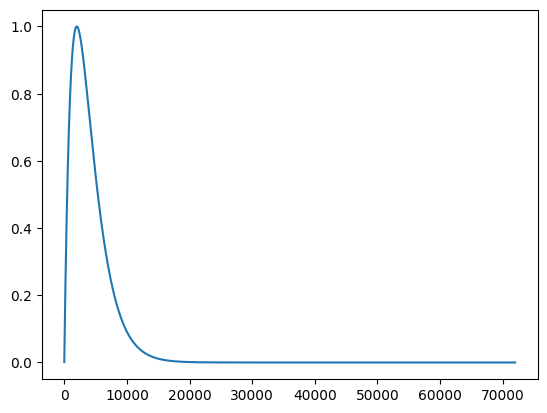

In [654]:
plt.plot(cup1noise)

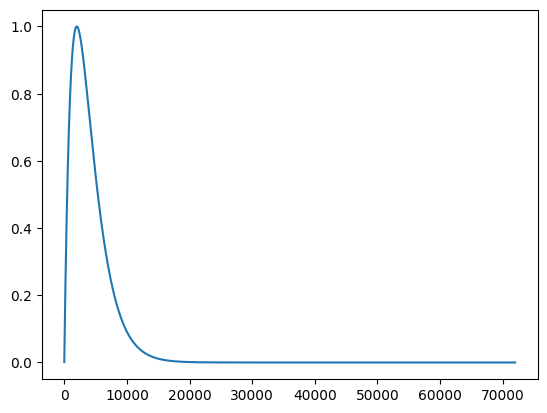

In [655]:
plt.plot(cup2noise)

In [656]:
ipd.Audio(output,rate=srate)

In [657]:
def envelope(segments,srate,duration): 
    nsamples = int(srate*duration)
    value = 0.0
    seg_index = 0 
    data = np.zeros(nsamples)
    segment_sample = 0 
    prev_target = 0.0

    for i in np.arange(nsamples): 
        if (seg_index < len(segments)): 
            target = segments[seg_index][0]
            rampT = segments[seg_index][1]
            delayT = segments[seg_index][2]
            rampS = (rampT / 1000.0) * srate 
            delayS = (delayT / 1000.0) * srate  
            if i < segment_sample + rampS: 
                incr = (target-prev_target) / rampS 
            elif i < segment_sample + rampS + delayS: 
                incr = 0.0 
            else: 
                if rampS != 0.0: 
                    incr = (target-prev_target) / rampS 
                else: 
                    incr = 0.0 
                segment_sample = i 
                segment_index = segment_index+1 
                prev_target = target 
            value = value + incr 
        data[i] = value
    return data  




def frequency_modulation(start, end, freq, freq_mod, mc_ratio, mod_index, srate,env, duration): 
    output = np.zeros(end-start)
    carrier_phase = 0.0 
    carrier_phase_incr = hz2radians(freq,srate)
    modulator_phase_incr = hz2radians(mc_ratio * freq,srate)
    
    amp_env = env  
    # get centered sin after integration 
    modulator_phase = 0.5 * (np.pi + modulator_phase_incr) 
    fm_index = hz2radians((mc_ratio * freq * mod_index), srate)
    
    ind_env = fm_index * env
    
    for t in np.arange(start, end): 
        modulation = ind_env[t] * np.sin(modulator_phase)
        
        output[t] = env[t] * np.sin(carrier_phase)
        
        carrier_phase += (modulation + carrier_phase_incr)
        modulator_phase += modulator_phase_incr
    amp_env= np.linspace(1.0, 0.0, int(duration*srate))
    mod_env= np.linspace(mod_index, 0.0, int(duration*srate))
    temp = np.linspace(0.0, duration, int(duration*srate), endpoint=False)
    modW = np.sin(2.0 * np.pi * freq * temp)
    precussion = (np.sin(2.0 * np.pi * (freq + mod_env * modW) * temp)) * amp_env
    output /= np.max(np.abs(precussion))

    return output 

s1 = [(1, 200,  0), (0.6,200,0), (0.5, 500,0), (0.0, 100, 0)]
srate =44100
duration = 1.0
freq = 440.0
freq_mod = 100.0
mod_index = 100.0

env = envelope(s1, srate, duration)

output = frequency_modulation(0, srate, freq, freq_mod, 1, mod_index, srate, env, duration)
plt.plot(output)

UnboundLocalError: local variable 'segment_index' referenced before assignment

In [ ]:
ipd.Audio(output, rate=srate)

In [ ]:
output = frequency_modulation(0, srate, 440, .5, 1, 1, srate, env)

TypeError: frequency_modulation() missing 1 required positional argument: 'duration'

In [ ]:
import boreal 
boreal.spectrum((output, srate))

http://localhost:8972


Loading BokehJS ...

End of file
End of file
End of file


In [ ]:
output = frequency_modulation(0, srate, 800, .5, 0.25, 4.0, srate, env)
ipd.Audio(output, rate=srate)

In [ ]:

s2 = [(0.5, 60,  0), (1.0,40,0), (1.0, 800,0), (0.0, 100, 0)]
env = envelope(s2, srate, 1)
output = frequency_modulation(0, srate, 900, .5, 0.33, 2.0, srate, env)
ipd.Audio(output, rate=srate)





In [ ]:
    # (with-sound () (fm 0 1.0 500 .5 .2 1.5 '(0 0 6 .5 10 1 90 1 100 0)))

                    
s3 = [(0.5, 60,  0), (1.0,40,0), (1.0, 800,0), (0.0, 100, 0)]
env = envelope(s3, srate, 1)
output = frequency_modulation(0, srate, 500, .5, 0.2, 1.5, srate, env)
ipd.Audio(output, rate=srate)

In [ ]:
#    (with-sound () (fm 0 1.0 900 .5 2/3 2 '(0 0 25 1 75 1 100 0)))

                    
s4 = [(1.0, 250,  0), (1.0,500,0), (0.0, 250,0)]
env = envelope(s4, srate, 1)
output = frequency_modulation(0, srate, 900, .5, 0.66, 2, srate, env)
ipd.Audio(output, rate=srate)

In [ ]:
def envelope(segments,srate,duration): 
    nsamples = int(srate*duration)
    value = 0.0
    segment_index = 0 
    data = np.zeros(nsamples)
    segment_sample = 0 
    prev_target = 0.0

    for i in np.arange(nsamples): 
        if (segment_index < len(segments)): 
            target = segments[segment_index][0]
            ramp_time = segments[segment_index][1]
            delay_time = segments[segment_index][2]
            
            ramp_samples = (ramp_time / 1000.0) * srate 
            delay_samples = (delay_time / 1000.0) * srate
            
            if i < segment_sample + ramp_samples: 
                incr = (target-prev_target) / ramp_samples 
            elif i < segment_sample + ramp_samples + delay_samples: 
                incr = 0.0 
            else: 
                if ramp_samples != 0.0: 
                    incr = (target-prev_target) / ramp_samples 
                else: 
                    incr = 0.0 
                segment_sample = i 
                segment_index = segment_index+1 
                prev_target = target 
            value = value + incr 
        data[i] = value
    return data  
dur = srate
s1 = [(1, 200,  0), (0.6,200,0), (0.5, 500,0), (0.0, 100, 0)]
env = envelope(s1, srate, 1)

p = figure(plot_width=600, plot_height=200)
p.line(np.arange(0,len(env)),env)
show(p)





9600.0